## 15. Задача о сравнении средних в двух нормальных совокупностях. Критерий Стьюдента. Применение в R.

Исследователи собрали данные о действии химического препарата на мух (регистрировали время до смерти каждой мухи). 

Воздействие продолжалось 30 секунд и 1 минуту.

Нужно проверить, что среднее время до смерти в обеих группах совпадает.

In [2]:
f30 <- c(3,5,5,7,9,9,10,12,20,24,24,34,43,46,58,140)
f60 <- c(2,5,5,7,8,9,14,18,24,26,34,37,42,90)

In [3]:
mean(f30)
mean(f60)

[1] 28.0625

[1] 22.92857

Для проверки введем гипотезу Н0 о том, что среднее в обеих группах совпадают:
    
    H0: a1 = a2
    
    H1: a1 > a2

In [8]:
t.test(f30, f60, var.equal = TRUE, alt='greater')


	Two Sample t-test

data:  f30 and f60
t = 0.47329, df = 28, p-value = 0.3198
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -13.31885       Inf
sample estimates:
mean of x mean of y 
 28.06250  22.92857 


Исходя из того, что выдает критерий, необходимо принять гипотезу о совпадении средних в обеих группах, потому что p-value > 10%. 

Но критерий предполагает, что данные имеют нормальное распределение, но так ли это?

Для проверки этого воспользуемся критерием Шапиро-Уилкса о принадлежности данных к нормальному закону распределения.

In [7]:
shapiro.test(f30)


	Shapiro-Wilk normality test

data:  f30
W = 0.69111, p-value = 0.0001349


Данные не имеют нормального распределения! Значит применять критерий нельзя.

Также отсутствие принадлежности данных к нормальному распределению подтверждает и квантильный анализ, значения не выстраиваются вдоль одной прямой.

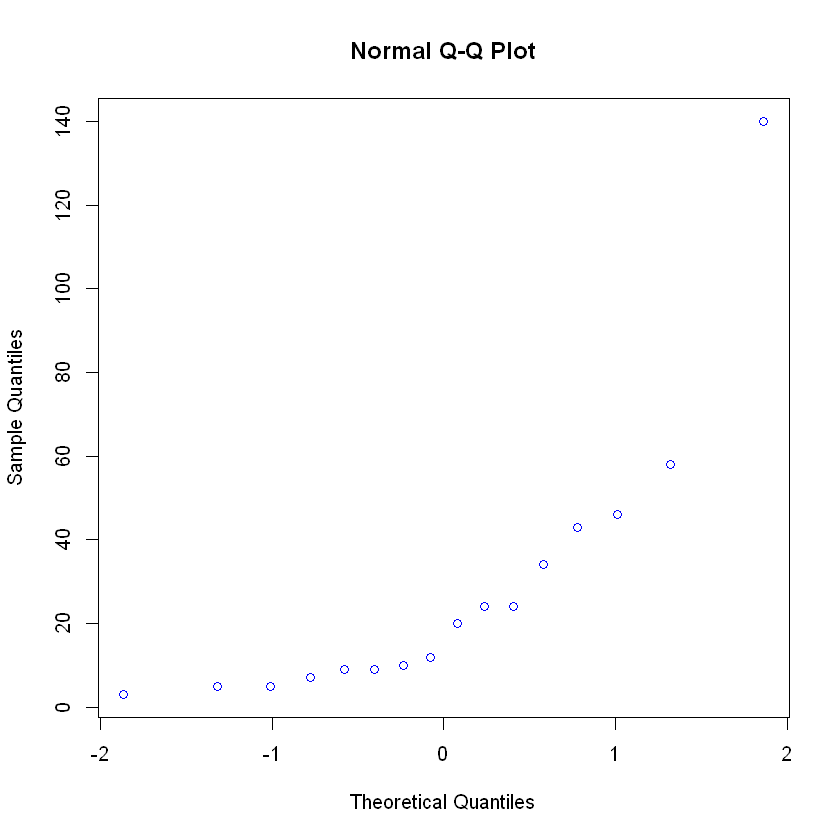

In [6]:
qqnorm(f30, col = 'blue')

Попробуем сделать данные нормальными.

In [9]:
log30 = log(f30)
log60 = log(f60)

In [11]:
mean(log30)
mean(log60)

[1] 2.807217

[1] 2.676781

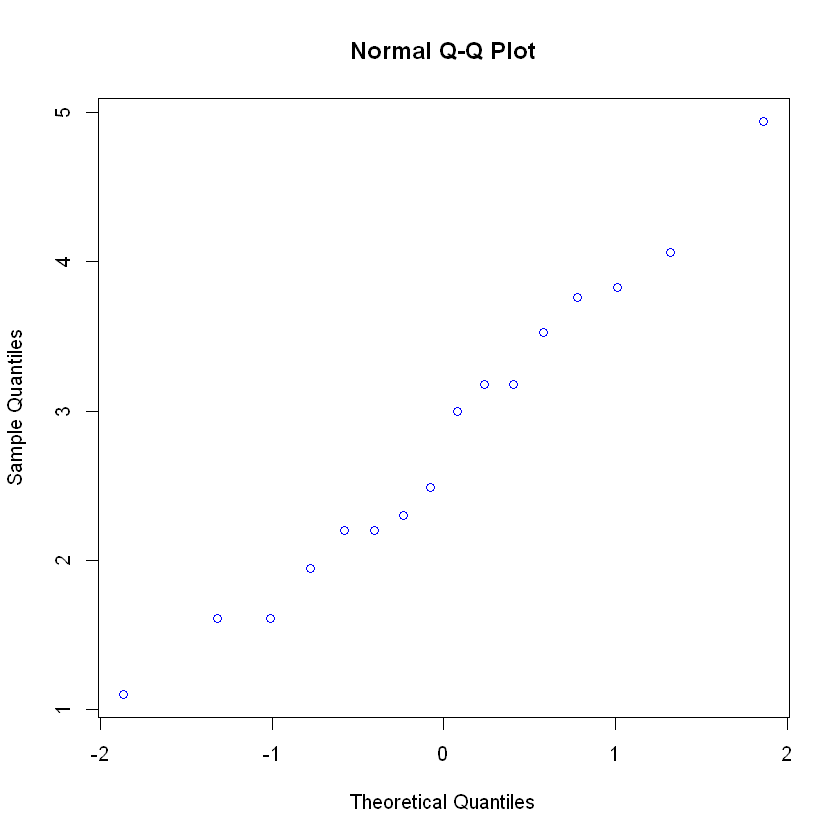

In [12]:
qqnorm(log(f30), col = 'blue')

Видно, что значения выстроились вдоль одной прямой.

Для подтверждения этого наблюдения применим критерий Шапиро-Уилкса.

In [13]:
shapiro.test(log30)
shapiro.test(log60)


	Shapiro-Wilk normality test

data:  log30
W = 0.97396, p-value = 0.898



	Shapiro-Wilk normality test

data:  log60
W = 0.97981, p-value = 0.9737


p-value для обоих выборок значительно выше, чем 0.1, поэтому принимаем гипотезу о том, что данные имеют нормально распределение.

Теперь можно воспользоваться критерием Стьюдента для решения исходной задачи.

In [15]:
t.test(log30, log60, var.equal = T, alt='greater')


	Two Sample t-test

data:  log30 and log60
t = 0.34119, df = 28, p-value = 0.3678
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.5198932        Inf
sample estimates:
mean of x mean of y 
 2.807217  2.676781 


Значит среднее в обеих выборках совпадает. Таким образом можно сделать заключение о том, что продолжительность воздействия химикатов не влияет на время до смерти.